In [1]:
import pandas as pd
import docx
import matplotlib.pyplot as plt
import numpy as np

## 1-Prevalence of anemia among women

In [2]:
root = '/home/dila-isi/PycharmProjects/homealarms/FAO/FOOD UTILIZATION/'
file = '/Prevalence of anemia among women.csv'

colombia = pd.read_csv(root + 'Colombia' + file)
ecuador = pd.read_csv(root + 'Ecuador' + file)
georgia = pd.read_csv(root + 'Georgia' + file)
peru = pd.read_csv(root + 'Peru' + file)
vietnam = pd.read_csv(root + 'Vietnam' + file)

In [6]:
colombia.set_index('Year', inplace=True)
ecuador.set_index('Year', inplace=True)
georgia.set_index('Year', inplace=True)
peru.set_index('Year', inplace=True)
vietnam.set_index('Year', inplace=True)
colombia = colombia.tail(9)
ecuador = ecuador.tail(9)
georgia = georgia.tail(9)
peru = peru.tail(9)
vietnam = vietnam.tail(9)

In [7]:
dfSummary=pd.DataFrame({"Country":['Colombia', 'Ecuador', 'Georgia','Peru', 'Vietnam', ]})
dfList=[colombia, ecuador, georgia, peru,vietnam ]

min,max,mean,std = [],[],[],[]
for df in dfList:
    min.append("%.2f" % df['Value'].min())
    max.append("%.2f" % df['Value'].max())
    mean.append("%.2f" % df['Value'].mean())
    std.append("%.2f" % df['Value'].std())

dfSummary['Mean']=mean
dfSummary['S.D.']=std
dfSummary['Min.']=min
dfSummary['Max.']=max

In [8]:
dfSummary

,Country,Mean,S.D.,Min.,Max.
0,Colombia,21.42,0.58,20.90,22.60
1,Ecuador,17.13,0.24,16.90,17.70
2,Georgia,26.98,0.24,26.80,27.50
3,Peru,20.39,0.37,20.10,21.20
4,Vietnam,18.30,1.30,17.00,20.60


In [9]:
df = dfSummary
# Initialise the Word document
doc = docx.Document()
# Initialise the table
t = doc.add_table(rows=1, cols=df.shape[1])
# Add borders
t.style = 'TableGrid'
# Add the column headings
for j in range(df.shape[1]):
    t.cell(0, j).text = df.columns[j]
# Add the body of the data frame
for i in range(df.shape[0]):
    row = t.add_row()
    for j in range(df.shape[1]):
        cell = df.iat[i, j]
        row.cells[j].text = str(cell)
# Save the Word doc
doc.save('Prevalence of anemia among women.docx')

/home/dila-isi/.conda/envs/homealarms/lib/python3.10/site-packages/docx/styles/styles.py:139: UserWarning: style lookup by style_id is deprecated. Use style name as key instead.
  return self._get_style_id_from_style(self[style_name], style_type)


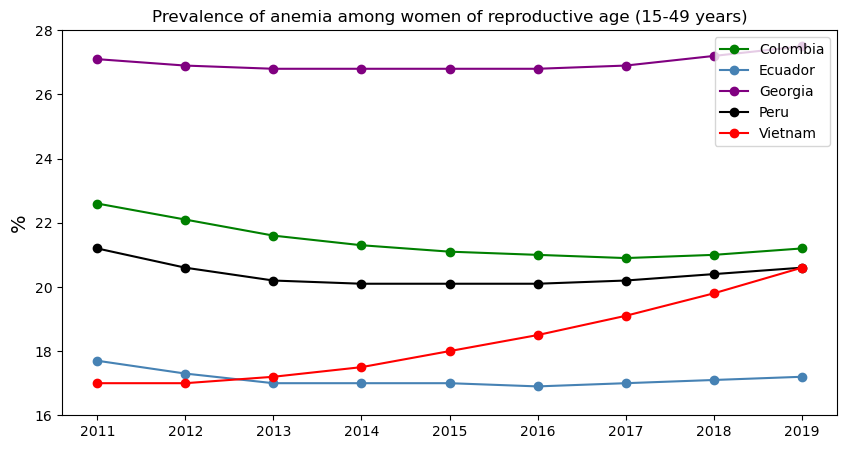

In [15]:
plt.subplots(figsize=(10, 5))
plt.plot(colombia['Value'], label='Colombia', color='green', marker='o')
plt.plot(ecuador['Value'], label='Ecuador', color='steelblue', marker='o')
plt.plot(georgia['Value'], label='Georgia', color='purple', marker='o')
plt.plot(peru['Value'], label='Peru', color='black', marker='o')
plt.plot(vietnam['Value'], label='Vietnam', color='red', marker='o')
plt.title('Prevalence of anemia among women of reproductive age (15-49 years)', fontsize=12)
plt.legend(title='Country')
plt.ylim(16,28)
plt.ylabel('%', fontsize=14)
#plt.figure(figsize=(15,100))


#plt.plot(range(10), linestyle='--', marker='o', color='b', label='line with marker')
plt.legend()